In [7]:

import sys
import time
import matplotlib.pyplot as plt
import numpy as np

from pypylon import pylon
from camera import BaslerCamera, list_basler_cameras

ModuleNotFoundError: No module named 'camera'

In [8]:
list_basler_cameras()

NameError: name 'list_basler_cameras' is not defined

In [4]:
N_GRAB = 100
WIDTH = 2048
HEIGHT = 2048
data = []
timestamps = []

with BaslerCamera(
    index=0,
    FPS=100,
    EXPOSURE_TIME=9700,
    GAIN=30,
    GAMMA=1.0,
    WIDTH=2048,
    HEIGHT=2048,
    OFFSETX=0,
    OFFSETY=0,
    CAMERA_FORMAT="Mono8",
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False
    ) as camera:
    camera.start()
    for i in range(N_GRAB):
        data.append(camera.get_array(timeout=20))
        timestamps.append(time.perf_counter())
    camera.stop()


Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Registered software trigger configuration.
Set MaxNumBuffer to 5.
Camera initialized.
Exposure time set to 9700 microseconds.
Gain set to 30 dB.
Set width to 2048, height to 2048, offset to (0, 0).
Camera initialized.


In [5]:
import numpy as np
1/np.diff(timestamps)

array([39.77119155, 40.23477796, 40.17816444, 40.17552207, 40.17473435,
       39.62661586, 40.67947907, 39.78730187, 40.33010675, 39.76068524,
       40.2971739 , 39.9068383 , 42.80006592, 40.24268591, 39.85176581,
       39.9381486 , 39.71171673, 39.8667923 , 40.28776585, 39.8786286 ,
       39.88997389, 39.64733378, 39.7952281 , 40.14671855, 40.09872953,
       39.93714052, 40.18012754, 40.18456284, 39.92605537, 39.6710681 ,
       39.77364343, 39.84825947, 40.03308973, 39.99807371, 39.88408247,
       40.06130182, 39.8083023 , 40.04629355, 40.0907269 , 40.00713726,
       40.19180171, 40.21878051, 40.06765824, 40.17024796, 40.33682213,
       40.32960095, 39.80452157, 40.09999012, 40.14737945, 39.89351143,
       45.59540625, 40.13759165, 40.17474732, 39.94081248, 40.33809129,
       40.34433571, 40.17961732, 40.31725326, 40.02713041, 40.15975711,
       40.85118506, 40.71874779, 40.81657813, 40.87920874, 40.68647025,
       40.66914241, 40.48605454, 40.8169396 , 40.18323236, 40.23

In [3]:
N_GRAB = 100
WIDTH = 2048
HEIGHT = 2048
data = np.zeros((N_GRAB, HEIGHT, WIDTH), dtype=np.uint8)
timestamps = np.zeros(N_GRAB, dtype=np.float64)

with BaslerCamera(
    index=0,
    FPS=20,
    EXPOSURE_TIME=9700,
    GAIN=30,
    WIDTH=2048,
    HEIGHT=2048,
    OFFSETX=0,
    OFFSETY=0,
    CAMERA_FORMAT="Mono8",
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False
    ) as camera:

    assert not camera.cam.IsUsb()

    # get tick frequency
    freq = camera.cam.GevTimestampTickFrequency.GetValue()
    print(f"Camera timestamp tick frequency: {freq}")

    print("Grab using the GrabStrategy_UpcomingImage strategy")

    # Reconfigure the camera to use continuous acquisition.
    pylon.AcquireContinuousConfiguration().OnOpened(camera.cam)

    # # loading the default settings
    # camera.cam.UserSetSelector = camera.cam.UserSetDefault.Value
    # camera.cam.UserSetLoad.Execute()
    # print("Setting Camera to Default Settings")

    camera.cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

    for i in range(N_GRAB):
        # Queues a buffer for grabbing and waits for the grab to finish.
        grabResult = camera.cam.RetrieveResult(int(10*1000/camera.FPS), pylon.TimeoutHandling_ThrowException)
        # data.append(grabResult.Array)
        # timestamps.append(grabResult.TimeStamp/freq)
        timestamps[i] = grabResult.TimeStamp/freq
        # data[i] = grabResult.Array
        # release the buffer
        grabResult.Release()

        # # print(f"Grabbed image {i+1}/{N_GRAB} at {(timestamps[-1]-timestamps[0]):.3f} seconds")

        

        # # Check no grab result is waiting, because no buffers are queued for grabbing.
        # if camera.cam.GetGrabResultWaitObject().Wait(0):
        #     raise Exception("A grab result is waiting when none should be.")

    # Stop the grabbing
    camera.cam.StopGrabbing()


Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Registered software trigger configuration.
Set MaxNumBuffer to 5.
Camera initialized.
Exposure time set to 9700 microseconds.
Gain set to 30 dB.
Set width to 2048, height to 2048, offset to (0, 0).
Camera initialized.
Camera timestamp tick frequency: 1000000000
Grab using the GrabStrategy_UpcomingImage strategy


In [25]:
import numpy as np
1/np.diff(timestamps)

array([50.28628485, 50.28628738, 50.28628485, 50.28628738, 50.28628485,
       50.28628738, 50.28628738, 50.28628232, 50.28628991, 50.28628485,
       50.28628738, 50.28628485, 50.28628738, 50.28628485, 50.28628485,
       50.28628485, 50.28628991, 50.28628232, 50.28628738, 50.28628485,
       50.28628485, 50.28628738, 50.28628485, 50.28628738, 50.28628738,
       50.28628738, 50.28628485, 50.28628738, 50.28628485, 50.28628738,
       50.28628485, 50.28628485, 50.28628485, 50.28628485, 50.28628738,
       50.28628485, 50.28628738, 50.28628485, 50.28628738, 50.28628485,
       50.28628991, 50.28628485, 50.28628738, 50.28626968, 50.28628485,
       50.28628738, 50.28628485, 50.28628485, 50.28628485, 50.28628738,
       50.28628485, 50.28628738, 50.28628485, 50.28628738, 50.28628738,
       50.28628485, 50.28628485, 50.28628738, 50.28628738, 50.28628485,
       50.28628738, 50.28628485, 50.28628738, 50.28628485, 50.28628485,
       50.28628738, 50.28628485, 50.28628485, 50.28628485, 50.28

In [27]:
# save as mp4
import cv2
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('video.mp4', fourcc, camera.FPS, (WIDTH, HEIGHT), isColor=False)
for i in range(N_GRAB):
    video.write(data[i])
video.release()



# minimal example


In [5]:
import sys
import time
import numpy as np
from pypylon import pylon
import matplotlib.pyplot as plt

N_GRAB = 1000
EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 10000, 30, "Mono8", 2048, 2048, 0, 0

data = np.zeros((N_GRAB, HEIGHT, WIDTH), dtype=np.uint8)
timestamps_a = np.zeros(N_GRAB, dtype=np.float64)
timestamps_b = np.zeros(N_GRAB, dtype=np.float64)

In [6]:
cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.AcquireContinuousConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = N_GRAB

# Open the camera.
cam.Open()

# Turn off auto exposure and set exposure time
cam.ExposureAuto.SetValue("Off")
cam.ExposureTime.SetValue(EXPOSURE_TIME)

# Turn off auto gain and set gain
cam.GainAuto.SetValue("Off")
cam.Gain.SetValue(GAIN)

# get viable pixel formats
pixel_formats = cam.PixelFormat.Symbolics
assert CAMERA_FORMAT in pixel_formats, f"Invalid pixel format.  Must be one of {pixel_formats}"
cam.PixelFormat.SetValue(CAMERA_FORMAT)

# set width and height
cam.Width.SetValue(WIDTH)
cam.Height.SetValue(HEIGHT)
cam.OffsetX.SetValue(OFFSETX)
cam.OffsetY.SetValue(OFFSETY)

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()
print("Timestamp Frequency: ", TSFREQ)
# START OF VERSION 1 (NO ARRAY ALLOCATION)

# Start the grabbing  (no array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_LatestImageOnly)

for i in range(N_GRAB):
    # Queues a buffer for grabbing and waits for the grab to finish.
    grabResult = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
    if grabResult.GrabSucceeded():
        timestamps_a[i] = grabResult.TimeStamp/TSFREQ
    else:
        print(f"Frame {i} failed to grab due to : {grabResult.GetErrorDescription()}")
    # release the buffer
    grabResult.Release()

    # Check no grab result is waiting, because no buffers are queued for grabbing.
    if cam.GetGrabResultWaitObject().Wait(0):
        raise Exception("A grab result is waiting when none should be.")

# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_a[-1]-timestamps_a[0]:.3f} seconds")
print(f"Frame rate: {1/np.diff(timestamps_a).mean():.2f} +/- {1/np.diff(timestamps_a).std():.2f} Hz (Max: {1/np.diff(timestamps_a).min():.2f} Hz, Min: {1/np.diff(timestamps_a).max():.2f} Hz)")

# print resulting frame rate
print(cam.ResultingFrameRate.GetValue())

# close the camera
cam.Close()

del cam

RuntimeException: No device is available or no device contains the provided device info properties. : RuntimeException thrown (file 'TlFactory.cpp', line 694)

In [2]:
cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.AcquireContinuousConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = N_GRAB

# Open the camera.
cam.Open()

# Turn off auto exposure and set exposure time
cam.ExposureAuto.SetValue("Off")
cam.ExposureTime.SetValue(EXPOSURE_TIME)

# Turn off auto gain and set gain
cam.GainAuto.SetValue("Off")
cam.Gain.SetValue(GAIN)

# get viable pixel formats
pixel_formats = cam.PixelFormat.Symbolics
assert CAMERA_FORMAT in pixel_formats, f"Invalid pixel format.  Must be one of {pixel_formats}"
cam.PixelFormat.SetValue(CAMERA_FORMAT)

# set width and height
cam.Width.SetValue(WIDTH)
cam.Height.SetValue(HEIGHT)
cam.OffsetX.SetValue(OFFSETX)
cam.OffsetY.SetValue(OFFSETY)

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()

# START OF VERSION 2 (WITH ARRAY ALLOCATION)

# Start the grabbing  (array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_LatestImageOnly)

overload = []

for i in range(N_GRAB):
    # Queues a buffer for grabbing and waits for the grab to finish.
    grabResult = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
    pre = time.perf_counter()
    if grabResult.GrabSucceeded():
        data[i] = grabResult.Array # this is the only difference
        timestamps_b[i] = grabResult.TimeStamp/TSFREQ
    else:
        print(f"Frame {i} failed to grab due to : {grabResult.GetErrorDescription()}")
    overload.append(time.perf_counter()-pre)
    
    # release the buffer
    grabResult.Release()

    # Check no grab result is waiting, because no buffers are queued for grabbing.
    if cam.GetGrabResultWaitObject().Wait(0):
        raise Exception("A grab result is waiting when none should be.")
    
# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_b[-1]-timestamps_b[0]:.3f} seconds")
print(f"Frame rate: {1/np.diff(timestamps_b).mean():.2f} +/- {1/np.diff(timestamps_b).std():.2f} Hz (Max: {1/np.diff(timestamps_b).min():.2f} Hz, Min: {1/np.diff(timestamps_b).max():.2f} Hz)")

# print resulting frame rate
print(cam.ResultingFrameRate.GetValue())

# close the camera
cam.Close()

del cam

NameError: name 'pylon' is not defined

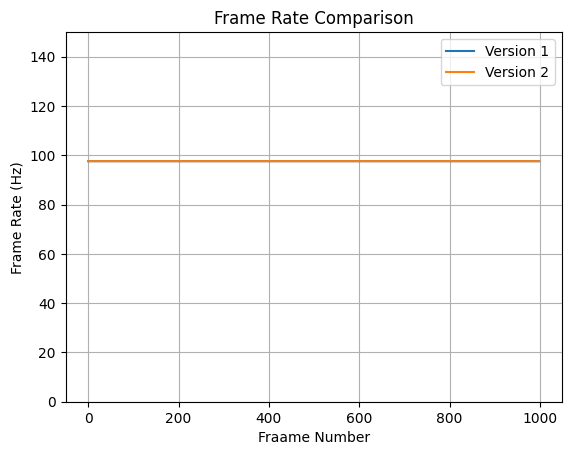

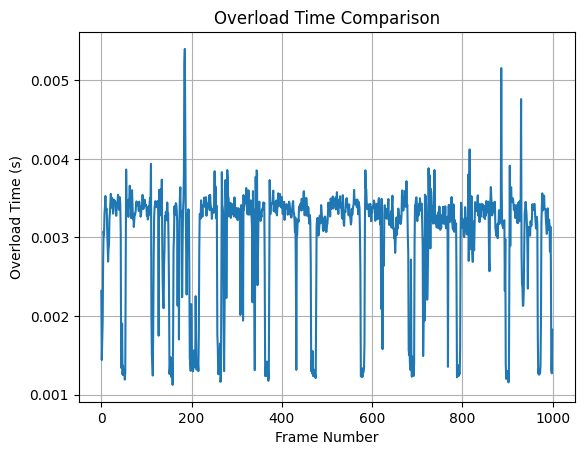

In [4]:
# plot the frame rates
plt.figure()
plt.plot(1/np.diff(timestamps_a), label="Version 1")
plt.plot(1/np.diff(timestamps_b), label="Version 2")
plt.legend()
plt.xlabel("Fraame Number")
plt.ylabel("Frame Rate (Hz)")
plt.title("Frame Rate Comparison")
plt.grid()
plt.ylim(0, 150)
plt.show()

# plot the overload times
plt.figure()
plt.plot(overload)
plt.xlabel("Frame Number")
plt.ylabel("Overload Time (s)")
plt.title("Overload Time Comparison")
plt.grid()
plt.show()


In [6]:
data.shape

(1000, 2048, 2048)

In [7]:
import sys
import time
import numpy as np
from pypylon import pylon

N_GRAB = 1000
EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 10000, 30, "Mono8", 2048, 2048, 0, 0

data = np.zeros((N_GRAB, HEIGHT, WIDTH), dtype=np.uint8)
timestamps_a = np.zeros(N_GRAB, dtype=np.float64)
timestamps_b = np.zeros(N_GRAB, dtype=np.float64)

cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = N_GRAB

# Open the camera.
cam.Open()

# Turn off auto exposure and set exposure time
cam.ExposureAuto.SetValue("Off")
cam.ExposureTime.SetValue(EXPOSURE_TIME)

# Turn off auto gain and set gain
cam.GainAuto.SetValue("Off")
cam.Gain.SetValue(GAIN)

# get viable pixel formats
pixel_formats = cam.PixelFormat.Symbolics
assert CAMERA_FORMAT in pixel_formats, f"Invalid pixel format.  Must be one of {pixel_formats}"
cam.PixelFormat.SetValue(CAMERA_FORMAT)

# set width and height
cam.Width.SetValue(WIDTH)
cam.Height.SetValue(HEIGHT)
cam.OffsetX.SetValue(OFFSETX)
cam.OffsetY.SetValue(OFFSETY)

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()

# START OF VERSION 1 (NO ARRAY ALLOCATION)

# Start the grabbing  (no array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

for i in range(N_GRAB):
    if cam.IsGrabbing():
        # send software trigger
        if cam.WaitForFrameTriggerReady(1000, pylon.TimeoutHandling_ThrowException):
            cam.ExecuteSoftwareTrigger()
            # grab the result
            result = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
            timestamps_a[i] = result.TimeStamp/TSFREQ
            result.Release()

# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_a[-1]-timestamps_a[0]} seconds")
print(f"Frame rate: {1/np.diff(timestamps_a).mean():.2f} +/- {1/np.diff(timestamps_a).std():.2f} Hz (Max: {1/np.diff(timestamps_a).min():.2f} Hz, Min: {1/np.diff(timestamps_a).max():.2f} Hz)")

# print resulting frame rate
print(cam.ResultingFrameRate.GetValue())

# close the camera
cam.Close()

del cam



Camera a2A2448-105g5m_40490701 selected.
1000 frames acquired in 21.234116679999715 seconds
Frame rate: 47.05 +/- 6960.05 Hz (Max: 47.58 Hz, Min: 44.36 Hz)
97.62764814995607


In [10]:
cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = N_GRAB

# Open the camera.
cam.Open()

# Turn off auto exposure and set exposure time
cam.ExposureAuto.SetValue("Off")
cam.ExposureTime.SetValue(EXPOSURE_TIME)

# Turn off auto gain and set gain
cam.GainAuto.SetValue("Off")
cam.Gain.SetValue(GAIN)

# get viable pixel formats
pixel_formats = cam.PixelFormat.Symbolics
assert CAMERA_FORMAT in pixel_formats, f"Invalid pixel format.  Must be one of {pixel_formats}"
cam.PixelFormat.SetValue(CAMERA_FORMAT)

# set width and height
cam.Width.SetValue(WIDTH)
cam.Height.SetValue(HEIGHT)
cam.OffsetX.SetValue(OFFSETX)
cam.OffsetY.SetValue(OFFSETY)

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()

# START OF VERSION 2 (WITH ARRAY ALLOCATION)

# Start the grabbing  (array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)
overload = []
for i in range(N_GRAB):
    if cam.IsGrabbing():
        # send software trigger
        if cam.WaitForFrameTriggerReady(1000, pylon.TimeoutHandling_ThrowException):
            cam.ExecuteSoftwareTrigger()
            # grab the result
            result = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
            pre = time.perf_counter()
            data[i] = result.Array # this is the only difference
            overload.append(time.perf_counter()-pre)
            timestamps_b[i] = result.TimeStamp/TSFREQ
            result.Release()

    
# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_b[-1]-timestamps_b[0]} seconds")
print(f"Frame rate: {1/np.diff(timestamps_b).mean():.2f} +/- {1/np.diff(timestamps_b).std():.2f} Hz (Max: {1/np.diff(timestamps_b).min():.2f} Hz, Min: {1/np.diff(timestamps_b).max():.2f} Hz)")

# print resulting frame rate
print(cam.ResultingFrameRate.GetValue())

# close the camera
cam.Close()

del cam



Camera a2A2448-105g5m_40490701 selected.
1000 frames acquired in 25.80289626600097 seconds
Frame rate: 38.72 +/- 643.63 Hz (Max: 45.00 Hz, Min: 32.78 Hz)
97.62764814995607


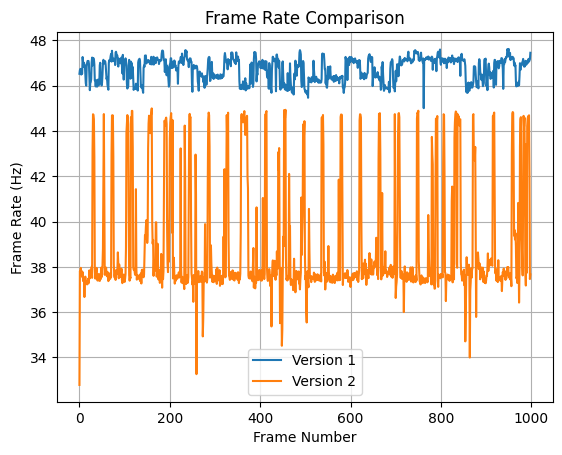

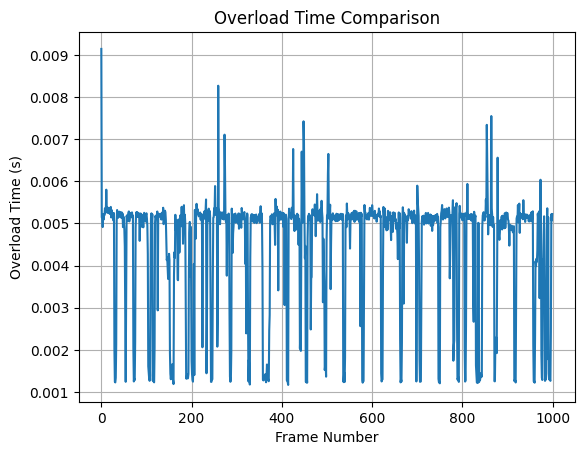

In [11]:
# plot the frame rates
plt.figure()
plt.plot(1/np.diff(timestamps_a), label="Version 1")
plt.plot(1/np.diff(timestamps_b), label="Version 2")
plt.legend()
plt.xlabel("Frame Number")
plt.ylabel("Frame Rate (Hz)")
plt.title("Frame Rate Comparison")
plt.grid()
plt.show()

# plot the overload times
plt.figure()
plt.plot(overload)
plt.xlabel("Frame Number")
plt.ylabel("Overload Time (s)")
plt.title("Overload Time Comparison")
plt.grid()
plt.show()


In [28]:
import sys, pypylon.pylon, platform
print(f'python: {sys.version}')
print(f'platform: {sys.platform}/{platform.machine()}/{platform.release()}')
print(f'pypylon: {pypylon.pylon.__version__} / {".".join([str(i) for i in pypylon.pylon.GetPylonVersion()])}')

python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
platform: linux/x86_64/6.5.0-44-generic
pypylon: 4.0.0 / 8.0.0.10


In [1]:
import sys
import time
import numpy as np
from pypylon import pylon

N_GRAB = 1000
EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 10000, 30, "Mono8", 2048, 2048, 0, 0

data = np.zeros((N_GRAB, HEIGHT, WIDTH), dtype=np.uint8)
timestamps_a = np.zeros(N_GRAB, dtype=np.float64)
timestamps_b = np.zeros(N_GRAB, dtype=np.float64)

cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.AcquireContinuousConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = 15

# Open the camera.
cam.Open()

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()

# START OF VERSION 1 (NO ARRAY ALLOCATION)

# Start the grabbing  (no array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

for i in range(N_GRAB):
    # Queues a buffer for grabbing and waits for the grab to finish.
    grabResult = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
    timestamps_a[i] = grabResult.TimeStamp/TSFREQ
    # release the buffer
    grabResult.Release()

    # Check no grab result is waiting, because no buffers are queued for grabbing.
    if cam.GetGrabResultWaitObject().Wait(0):
        raise Exception("A grab result is waiting when none should be.")

# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_a[-1]-timestamps_a[0]:.3f} seconds")
print(f"Frame rate: {1/np.diff(timestamps_a).mean():.2f} +/- {1/np.diff(timestamps_a).std():.2f} Hz (Max: {1/np.diff(timestamps_a).min():.2f} Hz, Min: {1/np.diff(timestamps_a).max():.2f} Hz)")


# START OF VERSION 2 (WITH ARRAY ALLOCATION)

# Start the grabbing  (array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

for i in range(N_GRAB):
    # Queues a buffer for grabbing and waits for the grab to finish.
    grabResult = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
    data[i] = grabResult.Array # this is the only difference
    timestamps_b[i] = grabResult.TimeStamp/TSFREQ
    # release the buffer
    grabResult.Release()

    # Check no grab result is waiting, because no buffers are queued for grabbing.
    if cam.GetGrabResultWaitObject().Wait(0):
        raise Exception("A grab result is waiting when none should be.")
    
# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_b[-1]-timestamps_b[0]:.3f} seconds")
print(f"Frame rate: {1/np.diff(timestamps_b).mean():.2f} +/- {1/np.diff(timestamps_b).std():.2f} Hz (Max: {1/np.diff(timestamps_b).min():.2f} Hz, Min: {1/np.diff(timestamps_b).max():.2f} Hz)")

# close the camera
cam.Close()


Camera a2A2448-105g5m_40490701 selected.
1000 frames acquired in 10.233 seconds
Frame rate: 97.63 +/- 405145603.59 Hz (Max: 97.63 Hz, Min: 97.63 Hz)
1000 frames acquired in 20.148 seconds
Frame rate: 49.58 +/- 563.01 Hz (Max: 97.63 Hz, Min: 48.81 Hz)


In [2]:
import sys
import time
import numpy as np
from pypylon import pylon

N_GRAB = 1000
EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 10000, 30, "Mono8", 2048, 2048, 0, 0

data = np.zeros((N_GRAB, HEIGHT, WIDTH), dtype=np.uint8)
timestamps_a = np.zeros(N_GRAB, dtype=np.float64)
timestamps_b = np.zeros(N_GRAB, dtype=np.float64)

cam = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print(f"Camera {cam.GetDeviceInfo().GetModelName()}_{cam.GetDeviceInfo().GetSerialNumber()} selected.")

assert not cam.IsUsb(), "Camera is USB.  Use GigE or CoaXPress cameras."

# Register the standard event handler for configuring software triggered single frame acquisition.
cam.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll, pylon.Cleanup_Delete)

# Set MaxNumBuffer to 15
cam.MaxNumBuffer = 15

# Open the camera.
cam.Open()

# get frequency
TSFREQ = cam.GevTimestampTickFrequency.GetValue()

# START OF VERSION 1 (NO ARRAY ALLOCATION)

# Start the grabbing  (no array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

for i in range(N_GRAB):
    if cam.IsGrabbing():
        # send software trigger
        if cam.WaitForFrameTriggerReady(1000, pylon.TimeoutHandling_ThrowException):
            cam.ExecuteSoftwareTrigger()
            # grab the result
            result = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
            timestamps_a[i] = result.TimeStamp/TSFREQ
            result.Release()

# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_a[-1]-timestamps_a[0]} seconds")
print(f"Frame rate: {1/np.diff(timestamps_a).mean():.2f} +/- {1/np.diff(timestamps_a).std():.2f} Hz (Max: {1/np.diff(timestamps_a).min():.2f} Hz, Min: {1/np.diff(timestamps_a).max():.2f} Hz)")


# START OF VERSION 2 (WITH ARRAY ALLOCATION)

# Start the grabbing  (array is allocated)
cam.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

for i in range(N_GRAB):
    if cam.IsGrabbing():
        # send software trigger
        if cam.WaitForFrameTriggerReady(1000, pylon.TimeoutHandling_ThrowException):
            cam.ExecuteSoftwareTrigger()
            # grab the result
            result = cam.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
            data[i] = result.Array # this is the only difference
            timestamps_b[i] = result.TimeStamp/TSFREQ
            result.Release()

    
# Stop the grabbing
cam.StopGrabbing()

# estimate the frame rate
print(f"{N_GRAB} frames acquired in {timestamps_b[-1]-timestamps_b[0]} seconds")
print(f"Frame rate: {1/np.diff(timestamps_b).mean():.2f} +/- {1/np.diff(timestamps_b).std():.2f} Hz (Max: {1/np.diff(timestamps_b).min():.2f} Hz, Min: {1/np.diff(timestamps_b).max():.2f} Hz)")

# close the camera
cam.Close()


Camera a2A2448-105g5m_40490701 selected.
1000 frames acquired in 21.46407426800033 seconds
Frame rate: 46.54 +/- 171.91 Hz (Max: 47.65 Hz, Min: 5.38 Hz)
1000 frames acquired in 26.42448953799976 seconds
Frame rate: 37.81 +/- 1873.35 Hz (Max: 44.68 Hz, Min: 32.49 Hz)


In [16]:
N_GRAB = 100
WIDTH = 2048
HEIGHT = 2048
frames = []
timestamps = []

with BaslerCamera(
    index=0,
    FPS=100,
    EXPOSURE_TIME=9700,
    GAIN=30,
    GAMMA=1.0,
    WIDTH=2048,
    HEIGHT=2048,
    OFFSETX=0,
    OFFSETY=0,
    CAMERA_FORMAT="Mono8",
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False
    ) as camera:

    camera.cam.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll,
                             pylon.Cleanup_Delete)
    
    camera.cam.OutputQueueSize.Value = 1
    camera.cam.StartGrabbing(pylon.GrabStrategy_LatestImages)

    # Execute the software trigger, wait actively until the camera accepts the next frame trigger or until the timeout occurs.
    if camera.cam.WaitForFrameTriggerReady(200, pylon.TimeoutHandling_ThrowException):
        camera.cam.ExecuteSoftwareTrigger()

    # # Wait for all images.
    # time.sleep(0.2)

    # Check whether the grab results are waiting.
    if camera.cam.GetGrabResultWaitObject().Wait(0):
        print("Grab results wait in the output queue.")

    # Only the images received last are waiting in the internal output queue
    # and are now retrieved.
    # The grabbing continues in the background, e.g. when using hardware trigger mode.
    buffersInQueue = 0
    while True:
        grabResult = camera.RetrieveResult(0, pylon.TimeoutHandling_Return)
        if not grabResult.IsValid():
            break
        if grabResult.GetNumberOfSkippedImages():
            print("Skipped ", grabResult.GetNumberOfSkippedImages(), " image.")

        buffersInQueue += 1

    print("Retrieved ", buffersInQueue, " grab results from output queue.")

    # Stop the grabbing.
    camera.StopGrabbing()


Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Registered software trigger configuration.
Set MaxNumBuffer to 5.
Camera initialized.
Loaded default settings.
Exposure time set to 9700 microseconds.
Gain set to 30 dB.
Set width to 2048, height to 2048, offset to (0, 0).
Camera initialized.
OnDestroy event for device  a2A2448-105g5m
OnDestroyed event


TimeoutException: Waiting for frame trigger ready timed out. : TimeoutException thrown (file 'InstantCameraImpl.h', line 1663)

In [2]:
import time
import threading
import pickle
import signal
import sys
from pypylon import pylon
import numpy as np
import matplotlib.pyplot as plt

class BaslerCamera:
    def __init__(self,
                 gain=1, 
                 exposure_time=1500,
                 width=1080,
                 height=1080,
                 offsetX=0,
                 offsetY=0, 
                 capture_duration=None):
        """
        Initialize the BaslerCamera with the specified parameters.
        
        :param video_output_path: Path to save the captured video.
        :param timestamps_output_path: Path to save the timestamps pickle file.
        :param exposure_time: Exposure time in microseconds.
        :param gain: Gain for the camera.
        :param capture_duration: Duration for video capture in seconds. If None, capture will continue until interrupted by Ctrl+C.
        """
        # self.video_output_path = video_output_path
        # self.timestamps_output_path = timestamps_output_path
        self.gain = gain
        self.exposure_time = exposure_time
        self.width = width
        self.height = height
        self.offsetX = offsetX
        self.offsetY = offsetY
        self.camera = None
        self.stop_capture = False
        self.capture_duration = capture_duration
        self.frames = []
        self.timestamps = []
        signal.signal(signal.SIGINT, self.signal_handler)

    def initialize_camera(self):
        """
        Initialize the camera and set the parameters.
        """
        try:
            # "opening" the camera
            self.camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
            
            # Print the model name of the camera.
            print("Using device ", self.camera.GetDeviceInfo().GetModelName())

            self.camera.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), 
                                              pylon.RegistrationMode_ReplaceAll,
                                                pylon.Cleanup_Delete)

            # The parameter MaxNumBuffer can be used to control the count of buffers
            # allocated for grabbing. The default value of this parameter is 10.
            self.camera.MaxNumBuffer.Value = 15            
            
            self.camera.Open()

            # loading the default settings
            self.camera.UserSetSelector = self.camera.UserSetDefault.Value
            self.camera.UserSetLoad.Execute()
            print("Setting Camera to Default Settings")

            # turning off auto adjustments
            self.camera.GainAuto.Value = "Off"
            self.camera.ExposureAuto.Value = "Off"
            print("Turning Auto-Gain and Auto-Exposure Settings off")

            # setting parameters for the camera
            self.camera.Gain.SetValue(self.gain)
            print("Setting camera gain to: " + str(self.gain))

            self.camera.ExposureTime.SetValue(self.exposure_time)
            print("Setting camera exposure to: " + str(self.exposure_time) + "us")                

            self.camera.PixelFormat.Value = "Mono8"
            print("Setting the capture format to Mono8")

            self.camera.Width.SetValue(self.width)
            self.camera.Height.SetValue(self.height)
            self.camera.OffsetX.SetValue(self.offsetX)
            self.camera.OffsetY.SetValue(self.offsetY)
            print("Camera ROI set with the following parameters:")
            print("Width: ", self.width)
            print("Height: ", self.height)
            print("OffsetX: ", self.offsetX)
            print("Offsety: ", self.offsetY)
            
            # initializing the software trigger (I couldn't find much information on this, 
            # using the default from the example code)

            self.camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly)

            print("Camera Initialized!")
        except Exception as e:
            print(f"Error initializing camera: {e}")
            self.cleanup()
            raise
    
    def get_frame(self):
        
        if self.camera.WaitForFrameTriggerReady(1000, pylon.TimeoutHandling_ThrowException):
            self.camera.ExecuteSoftwareTrigger()
            
            grabResult = self.camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
            if grabResult.GrabSucceeded():
                
                capture_time = time.perf_counter()
                img = grabResult.GetArray()

                self.frames.append(img)
                self.timestamps.append(capture_time)

            grabResult.Release()

            # self.cleanup()

            return img, capture_time
    
        else:
            self.cleanup()

    def signal_handler(self, sig, frame):
        """
        Handle the SIGINT signal (Ctrl+C).
        """
        print('Signal received, stopping capture...')
        self.stop_capture = True
        self.cleanup()
        sys.exit(0)

    def cleanup(self):
        """
        Perform cleanup tasks: save video and timestamps.
        """
        if self.camera and self.camera.IsGrabbing():
            self.camera.StopGrabbing()
            self.camera.Close()
        # self.save_timestamps()
        print("Cleanup completed.")

In [3]:
camera = BaslerCamera(gain=1, 
                        exposure_time=1000, 
                        capture_duration=5)


camera.initialize_camera()
img, capture_time = camera.get_frame()
plt.imshow(img, cmap='gray')
plt.show()
camera.cleanup()

Using device  a2A2448-105g5m
Setting Camera to Default Settings
Turning Auto-Gain and Auto-Exposure Settings off
Setting camera gain to: 1
Setting camera exposure to: 1000us
Setting the capture format to Mono8
Camera ROI set with the following parameters:
Width:  1080
Height:  1080
OffsetX:  0
Offsety:  0


/tmp/ipykernel_52782/837189082.py:65: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.UserSetSelector.Value = Default
  self.camera.UserSetSelector = self.camera.UserSetDefault.Value


Camera Initialized!


TimeoutException: Waiting for frame trigger ready timed out. : TimeoutException thrown (file 'InstantCameraImpl.h', line 1663)

## Grab Strategies Test

In [15]:
import sys
import time

from pypylon import pylon

from imageeventprinter import ImageEventPrinter
from configurationeventprinter import ConfigurationEventPrinter

# The exit code of the sample application.
exitCode = 0

# Create an instant camera object for the camera device found first.
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Register the standard configuration event handler for enabling software triggering.
# The software trigger configuration handler replaces the default configuration
# as all currently registered configuration handlers are removed by setting the registration mode to RegistrationMode_ReplaceAll.
camera.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll,
                             pylon.Cleanup_Delete)

# For demonstration purposes only, add sample configuration event handlers to print out information
# about camera use and image grabbing.
camera.RegisterConfiguration(ConfigurationEventPrinter(), pylon.RegistrationMode_Append, pylon.Cleanup_Delete)
camera.RegisterImageEventHandler(ImageEventPrinter(), pylon.RegistrationMode_Append, pylon.Cleanup_Delete)

# Print the model name of the camera.
print("Using device ", camera.GetDeviceInfo().GetModelName())

# The parameter MaxNumBuffer can be used to control the count of buffers
# allocated for grabbing. The default value of this parameter is 10.
camera.MaxNumBuffer.Value = 15

# Open the camera.
camera.Open()

print("Grab using the GrabStrategy_OneByOne default strategy:")

# The GrabStrategy_OneByOne strategy is used. The images are processed
# in the order of their arrival.
camera.StartGrabbing(pylon.GrabStrategy_OneByOne)

# In the background, the grab engine thread retrieves the
# image data and queues the buffers into the internal output queue.

# Issue software triggers. For each call, wait up to 200 ms until the camera is ready for triggering the next image.
for i in range(3):
    if camera.WaitForFrameTriggerReady(200, pylon.TimeoutHandling_ThrowException):
        camera.ExecuteSoftwareTrigger()

# For demonstration purposes, wait for the last image to appear in the output queue.
time.sleep(0.2)

# Check that grab results are waiting.

if camera.GetGrabResultWaitObject().Wait(0):
    print("Grab results wait in the output queue.")

# All triggered images are still waiting in the output queue
# and are now retrieved.
# The grabbing continues in the background, e.g. when using hardware trigger mode,
# as long as the grab engine does not run out of buffers.
buffersInQueue = 0
while camera.RetrieveResult(0, pylon.TimeoutHandling_Return):
    buffersInQueue += 1

print("Retrieved ", buffersInQueue, " grab results from output queue.")

# Stop the grabbing.
camera.StopGrabbing()

print("Grab using strategy GrabStrategy_LatestImageOnly:")

# The GrabStrategy_LatestImageOnly strategy is used. The images are processed
# in the order of their arrival but only the last received image
# is kept in the output queue.
# This strategy can be useful when the acquired images are only displayed on the screen.
# If the processor has been busy for a while and images could not be displayed automatically
# the latest image is displayed when processing time is available again.
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly)

# Execute the software trigger, wait actively until the camera accepts the next frame trigger or until the timeout occurs.
for i in range(3):
    if camera.WaitForFrameTriggerReady(200, pylon.TimeoutHandling_ThrowException):
        camera.ExecuteSoftwareTrigger()

# Wait for all images.
time.sleep(0.2)

# Check whether the grab result is waiting.
if camera.GetGrabResultWaitObject().Wait(0):
    print("A grab result waits in the output queue.")

# Only the last received image is waiting in the internal output queue
# and is now retrieved.
# The grabbing continues in the background, e.g. when using hardware trigger mode.
buffersInQueue = 0

while True:
    grabResult = camera.RetrieveResult(0, pylon.TimeoutHandling_Return)
    if not grabResult.IsValid():
        break
    print("Skipped ", grabResult.GetNumberOfSkippedImages(), " images.")
    buffersInQueue += 1

print("Retrieved ", buffersInQueue, " grab result from output queue.")

# Stop the grabbing.
camera.StopGrabbing()

print("Grab using strategy GrabStrategy_LatestImages:")

# The GrabStrategy_LatestImages strategy is used. The images are processed
# in the order of their arrival, but only a number of the images received last
# are kept in the output queue.

# The size of the output queue can be adjusted.
# When using this strategy the OutputQueueSize parameter can be changed during grabbing.
camera.OutputQueueSize.Value = 2

camera.StartGrabbing(pylon.GrabStrategy_LatestImages)

# Execute the software trigger, wait actively until the camera accepts the next frame trigger or until the timeout occurs.
for i in range(3):
    if camera.WaitForFrameTriggerReady(200, pylon.TimeoutHandling_ThrowException):
        camera.ExecuteSoftwareTrigger()

# Wait for all images.
time.sleep(0.2)

# Check whether the grab results are waiting.
if camera.GetGrabResultWaitObject().Wait(0):
    print("Grab results wait in the output queue.")

# Only the images received last are waiting in the internal output queue
# and are now retrieved.
# The grabbing continues in the background, e.g. when using hardware trigger mode.
buffersInQueue = 0
while True:
    grabResult = camera.RetrieveResult(0, pylon.TimeoutHandling_Return)
    if not grabResult.IsValid():
        break
    if grabResult.GetNumberOfSkippedImages():
        print("Skipped ", grabResult.GetNumberOfSkippedImages(), " image.")

    buffersInQueue += 1

print("Retrieved ", buffersInQueue, " grab results from output queue.")

# When setting the output queue size to 1 this strategy is equivalent to grab strategy GrabStrategy_LatestImageOnly.
camera.OutputQueueSize.Value = 1

# When setting the output queue size to CInstantCamera::MaxNumBuffer this strategy is equivalent to GrabStrategy_OneByOne.
camera.OutputQueueSize.Value = camera.MaxNumBuffer.Value

# Stop the grabbing.
camera.StopGrabbing()

# The Upcoming Image grab strategy cannot be used together with USB camera devices.
# For more information, see the advanced topics section of the pylon Programmer's Guide.
if not camera.IsUsb():
    print("Grab using the GrabStrategy_UpcomingImage strategy:")

    # Reconfigure the camera to use continuous acquisition.
    pylon.AcquireContinuousConfiguration().OnOpened(camera)

    # The GrabStrategy_UpcomingImage strategy is used. A buffer for grabbing
    # is queued each time when RetrieveResult()
    # is called. The image data is grabbed into the buffer and returned.
    # This ensures that the image grabbed is the next image
    # received from the camera.
    # All images are still transported to the PC.
    camera.StartGrabbing(pylon.GrabStrategy_UpcomingImage)

    # Queues a buffer for grabbing and waits for the grab to finish.
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    # Sleep.
    time.sleep(0.2)

    # Check no grab result is waiting, because no buffers are queued for grabbing.
    if not camera.GetGrabResultWaitObject().Wait(0):
        print("No grab result waits in the output queue.")

    # Stop the grabbing
    camera.StopGrabbing()

# Close the camera.
camera.Close()

OnClose event for device  a2A2448-105g5m
OnClosed event for device  a2A2448-105g5m
OnDestroy event for device  a2A2448-105g5m
OnDestroyed event
Using device  a2A2448-105g5m
OnOpen event for device  a2A2448-105g5m
OnOpened event for device  a2A2448-105g5m
Grab using the GrabStrategy_OneByOne default strategy:
OnGrabStart event for device  a2A2448-105g5m
OnGrabStarted event for device  a2A2448-105g5m
Grab results wait in the output queue.
OnImageGrabbed event for device  a2A2448-105g5m
SizeX:  2048
SizeY:  2048
Gray values of first row:  [113 105 104 ...  18  17   9]

OnImageGrabbed event for device  a2A2448-105g5m
SizeX:  2048
SizeY:  2048
Gray values of first row:  [117 131 112 ...  17  14  15]

OnImageGrabbed event for device  a2A2448-105g5m
SizeX:  2048
SizeY:  2048
Gray values of first row:  [140 114 122 ...  18  15  16]

Retrieved  3  grab results from output queue.
OnGrabStop event for device  a2A2448-105g5m
OnGrabStopped event for device  a2A2448-105g5m
Grab using strategy GrabSt

In [1]:
import sys
import time

from pypylon import pylon

from imageeventprinter import ImageEventPrinter
from configurationeventprinter import ConfigurationEventPrinter

# The exit code of the sample application.
exitCode = 0

# Create an instant camera object for the camera device found first.
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Register the standard configuration event handler for enabling software triggering.
# The software trigger configuration handler replaces the default configuration
# as all currently registered configuration handlers are removed by setting the registration mode to RegistrationMode_ReplaceAll.
camera.RegisterConfiguration(pylon.SoftwareTriggerConfiguration(), pylon.RegistrationMode_ReplaceAll,
                             pylon.Cleanup_Delete)

# For demonstration purposes only, add sample configuration event handlers to print out information
# about camera use and image grabbing.
# camera.RegisterConfiguration(ConfigurationEventPrinter(), pylon.RegistrationMode_Append, pylon.Cleanup_Delete)
# camera.RegisterImageEventHandler(ImageEventPrinter(), pylon.RegistrationMode_Append, pylon.Cleanup_Delete)

# Print the model name of the camera.
print("Using device ", camera.GetDeviceInfo().GetModelName())

# The parameter MaxNumBuffer can be used to control the count of buffers
# allocated for grabbing. The default value of this parameter is 10.
camera.MaxNumBuffer.Value = 15

# Open the camera.
camera.Open()

EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 9700, 30, "Mono8", 2048, 2048, 0, 0

# Turn off auto exposure and set exposure time
camera.ExposureAuto.SetValue("Off")
camera.ExposureTime.SetValue(EXPOSURE_TIME)
print(f"Exposure time set to {EXPOSURE_TIME} microseconds.")

# Turn off auto gain and set gain
camera.GainAuto.SetValue("Off")
camera.Gain.SetValue(GAIN)
print(f"Gain set to {GAIN} dB.")

# get viable pixel formats
pixel_formats = camera.PixelFormat.Symbolics
assert CAMERA_FORMAT in pixel_formats, f"Invalid pixel format.  Must be one of {pixel_formats}"
camera.PixelFormat.SetValue(CAMERA_FORMAT)

# set width and height
camera.Width.SetValue(WIDTH)
camera.Height.SetValue(HEIGHT)
camera.OffsetX.SetValue(OFFSETX)
camera.OffsetY.SetValue(OFFSETY)
print(f"Set width to {WIDTH}, height to {HEIGHT}, offset to ({OFFSETX}, {OFFSETY}).")



print("Grab using strategy GrabStrategy_LatestImageOnly:")

# The GrabStrategy_LatestImageOnly strategy is used. The images are processed
# in the order of their arrival but only the last received image
# is kept in the output queue.
# This strategy can be useful when the acquired images are only displayed on the screen.
# If the processor has been busy for a while and images could not be displayed automatically
# the latest image is displayed when processing time is available again.
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly)

# Execute the software trigger, wait actively until the camera accepts the next frame trigger or until the timeout occurs.
for i in range(3):
    if camera.WaitForFrameTriggerReady(200, pylon.TimeoutHandling_ThrowException):
        camera.ExecuteSoftwareTrigger()

# Wait for all images.
time.sleep(0.2)

# Check whether the grab result is waiting.
if camera.GetGrabResultWaitObject().Wait(0):
    print("A grab result waits in the output queue.")

# Only the last received image is waiting in the internal output queue
# and is now retrieved.
# The grabbing continues in the background, e.g. when using hardware trigger mode.
buffersInQueue = 0

while True:
    grabResult = camera.RetrieveResult(0, pylon.TimeoutHandling_Return)
    if not grabResult.IsValid():
        break
    print("Skipped ", grabResult.GetNumberOfSkippedImages(), " images.")
    buffersInQueue += 1

print("Retrieved ", buffersInQueue, " grab result from output queue.")

# Stop the grabbing.
camera.StopGrabbing()

# Close the camera.
camera.Close()

Using device  a2A2448-105g5m
Exposure time set to 9700 microseconds.
Gain set to 30 dB.
Set width to 2048, height to 2048, offset to (0, 0).
Grab using strategy GrabStrategy_LatestImageOnly:
A grab result waits in the output queue.
Skipped  2  images.
Retrieved  1  grab result from output queue.
